In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-2024/vgchartz-2024.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')

In [4]:
df.shape

(64016, 14)

In [5]:
df.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [7]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

As we can see, in some columns about 70-80%  of the data is missing

In [8]:
df.describe

<bound method NDFrame.describe of                                                  img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
...                                              ...   
64011  /games/boxart/full_2779838AmericaFrontccc.jpg   
64012  /games/boxart/full_8031506AmericaFrontccc.jpg   
64013  /games/boxart/full_6553045AmericaFrontccc.jpg   
64014    /games/boxart/full_6012940JapanFrontccc.png   
64015                      /games/boxart/default.jpg   

                                  title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft 

In [9]:
df['genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [10]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

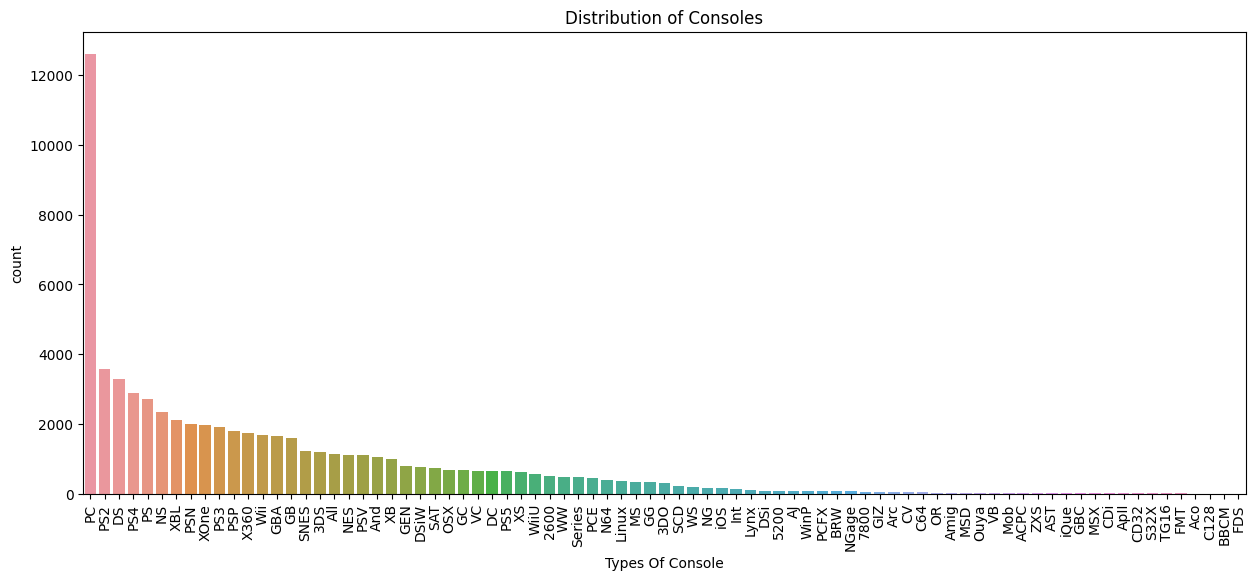

In [11]:
# Distribution of consoles
console = df['console'].value_counts()

plt.figure(figsize=(15,6))

sns.barplot(x = console.index,y=console.values)
plt.title('Distribution of Consoles')
plt.xlabel('Types Of Console')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


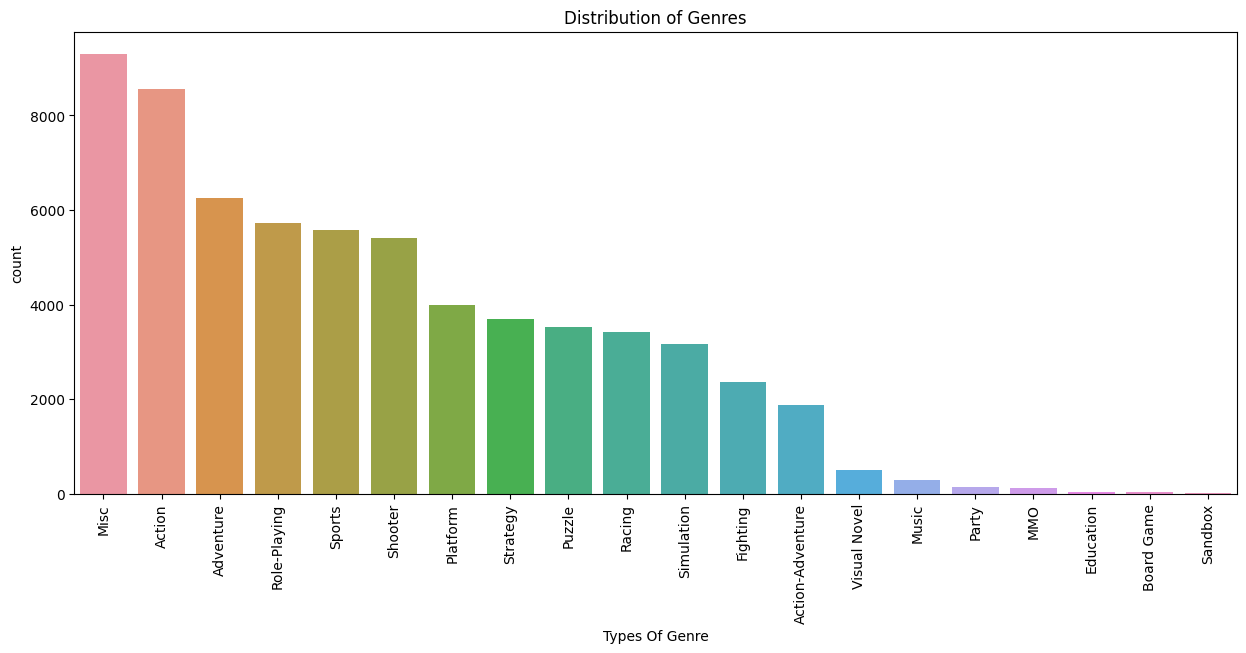

In [12]:
# Distribution of Genres
console = df['genre'].value_counts()

plt.figure(figsize=(15,6))

sns.barplot(x = console.index,y=console.values)
plt.title('Distribution of Genres')
plt.xlabel('Types Of Genre')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


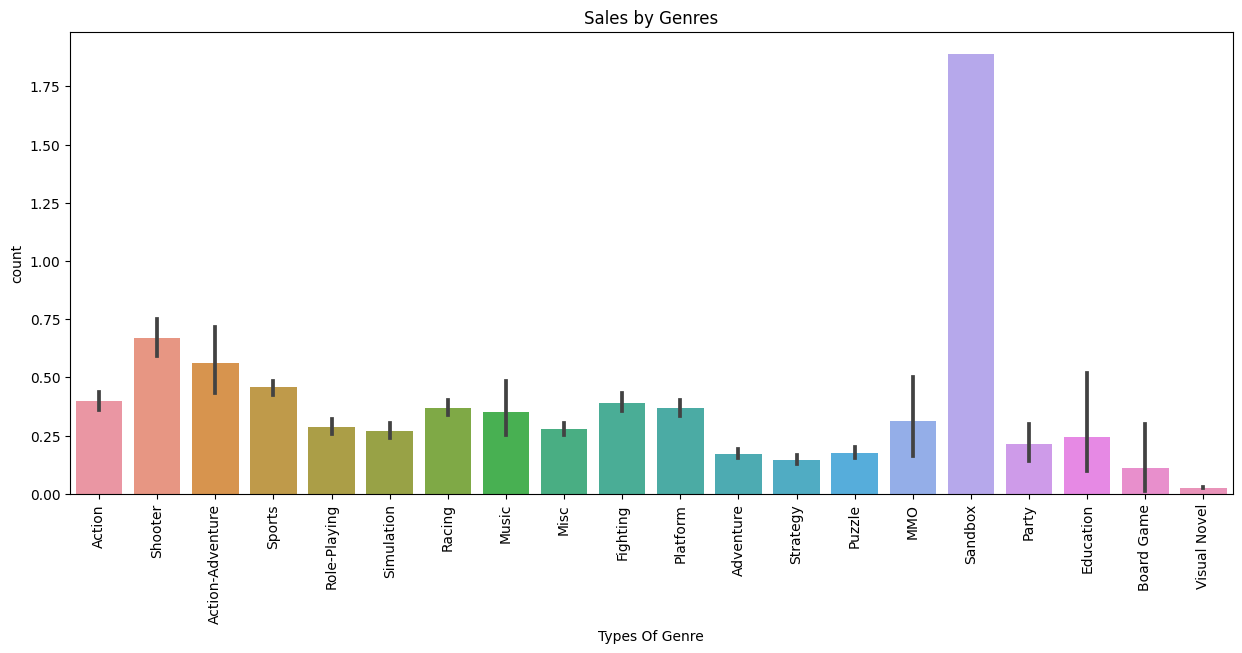

In [13]:
# Most sales by Genre
plt.figure(figsize=(15,6))
sns.barplot(x = df['genre'],y=df['total_sales'])
plt.title('Sales by Genres')
plt.xlabel('Types Of Genre')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


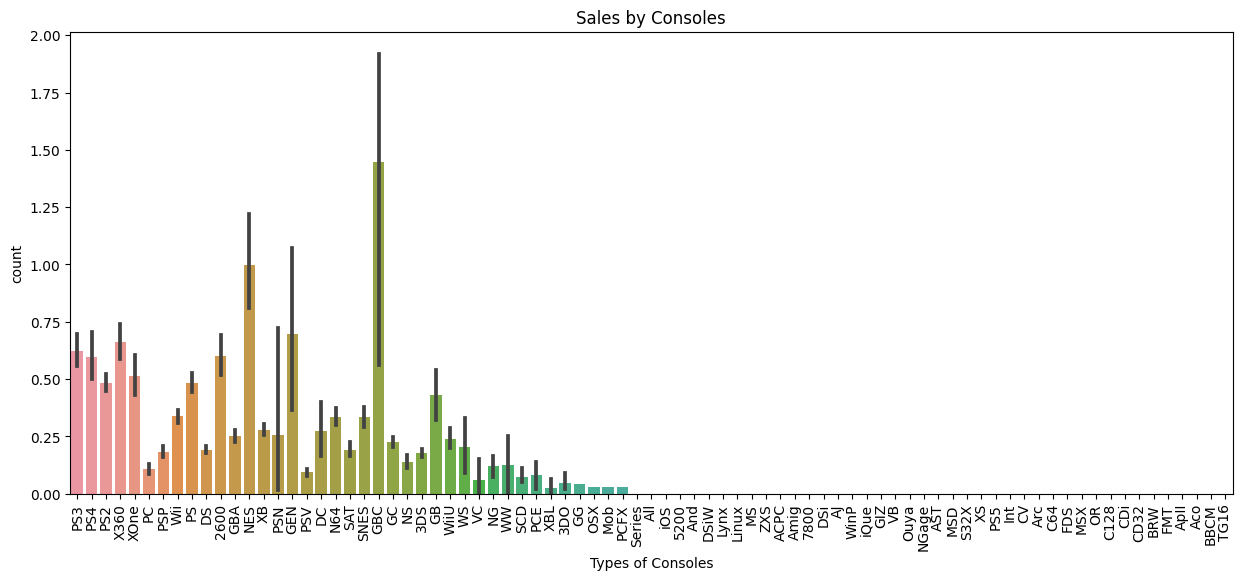

In [14]:
# Most sales by Consoles
plt.figure(figsize=(15,6))
sns.barplot(x = df['console'],y=df['total_sales'])
plt.title('Sales by Consoles')
plt.xlabel('Types of Consoles')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


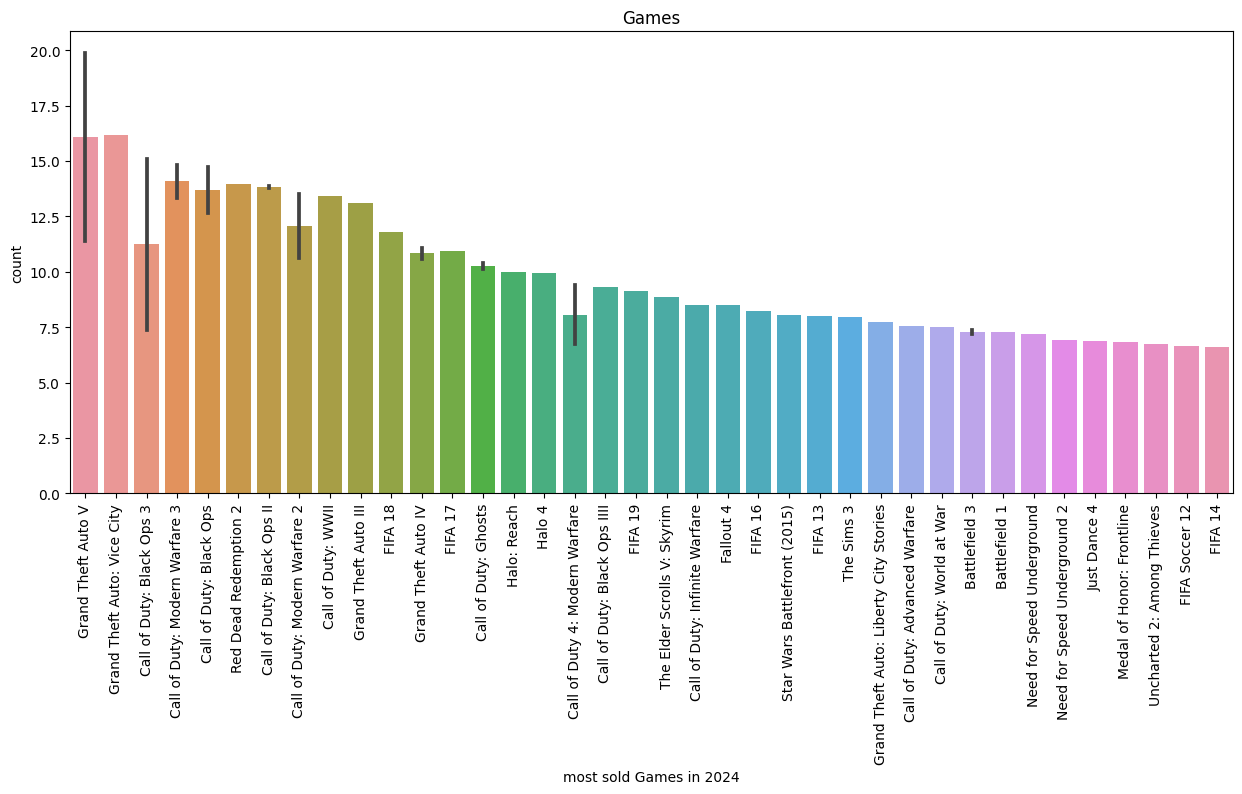

In [15]:
# Most sold Games in 2024
plt.figure(figsize=(15,6))
sns.barplot(x = df['title'].iloc[0:50],y=df['total_sales'].iloc[0:50])
plt.title('Games')
plt.xlabel('most sold Games in 2024')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()